In [ ]:
!pip install pennylane

# Loading necessary libraries and feature exploration

In [3]:
import pennylane as qml
from pennylane import numpy as np
import numpy as npd
import matplotlib.pyplot as plt
import pandas as pd
from pennylane.optimize import NesterovMomentumOptimizer
from prettytable import PrettyTable

In [5]:
whole_train = pd.read_csv('/content/mock_train_set.csv') 
whole_test = pd.read_csv('/content/mock_test_set.csv') 

Getting train and test set info

In [6]:
whole_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       300 non-null    float64
 1   1       300 non-null    float64
 2   2       300 non-null    float64
 3   3       300 non-null    float64
 4   4       300 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


In [7]:
whole_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       120 non-null    float64
 1   1       120 non-null    float64
 2   2       120 non-null    float64
 3   3       120 non-null    float64
 4   4       120 non-null    float64
dtypes: float64(5)
memory usage: 4.8 KB


In [8]:
whole_train.describe()

,0,1,2,3,4
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2630.877933,308630.410000,127187.050000,46.220000,0.476667
std,1416.096576,460586.067687,314218.134392,27.488488,0.500290
min,42.350000,1.000000,1.000000,1.000000,0.000000
25%,1408.067500,1.000000,10.000000,20.000000,0.000000
50%,2672.180000,1000.000000,1000.000000,50.000000,0.000000
75%,3895.692500,1000000.000000,10000.000000,70.000000,1.000000
max,4995.610000,1000000.000000,1000000.000000,90.000000,1.000000




---



Column 0 to 3 are features columns and Column 4 is the classification column.So counting number of each classes from Column 4.

---



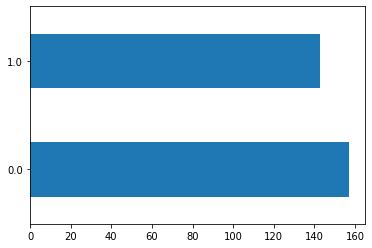

In [9]:
whole_train['4'].value_counts().plot(kind='barh')

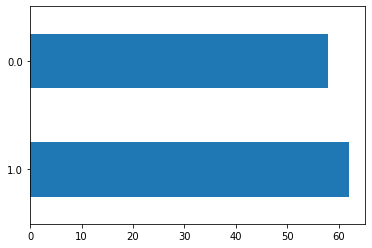

In [10]:
whole_test['4'].value_counts().plot(kind='barh')

The classification classes are almost balanced.



---



**Checking for continuos and discrete data (for Basis encoding scheme)**
If all values in column are unique, that means data is in continuos form, else if some values are in repition, that means data is in discrete form

In [11]:
cols = ['0','1','2','3','4']
for i in cols:
    print("Number of unique values in column ",int(i) , " of the train set is..",whole_train[i].nunique())
    if len(whole_train) == whole_train[i].nunique():
      print("This is continuos data")
    else:
      print("This is discrete data")
    print("Number of unique values in column ",int(i) , " of the test set is..",whole_test[i].nunique())
    if len(whole_test) == whole_test[i].nunique():
      print("This is continuos data")
    else:
      print("This is discrete data")
    print("---------------")

Number of unique values in column  0  of the train set is.. 300
This is continuos data
Number of unique values in column  0  of the test set is.. 120
This is continuos data
---------------
Number of unique values in column  1  of the train set is.. 6
This is discrete data
Number of unique values in column  1  of the test set is.. 6
This is discrete data
---------------
Number of unique values in column  2  of the train set is.. 7
This is discrete data
Number of unique values in column  2  of the test set is.. 7
This is discrete data
---------------
Number of unique values in column  3  of the train set is.. 19
This is discrete data
Number of unique values in column  3  of the test set is.. 19
This is discrete data
---------------
Number of unique values in column  4  of the train set is.. 2
This is discrete data
Number of unique values in column  4  of the test set is.. 2
This is discrete data
---------------


So Column 1 in both train and test set is continuos, while other columns are discrete

In [12]:
whole_train['1'].unique()

array([1.e+03, 1.e+06, 1.e+04, 1.e+02, 1.e+00, 1.e+01])



---



Since all the values are in powers of 10 in column 2 and 3, we might scale it down using Logarithm. Also, the feature columns can be normalized whenever necessary.

In [13]:
p = []
q = []
r = []
s = []
f = []
pt = []
qt = []
rt = []
st = []
ft = []
for i in range(len(whole_train)):
    x = 0
    y=0
    z=0
    t=0
    a = 0
    x = (whole_train['0'][i]- min(whole_train['0']))/ (max(whole_train['0']) - min(whole_train['0']))
    p.append(x)
    y = int(np.log10(whole_train['1'][i]))
    q.append(y)
    z = int(np.log10(whole_train['2'][i]))
    r.append(z)
    t = int(whole_train['3'][i]/10)
    s.append(t)
    a = int(whole_train['4'][i])
    f.append(a)

for i in range(len(whole_test)):
    x = 0
    y=0
    z=0
    t=0
    a=0
    x = (whole_test['0'][i]- min(whole_test['0']))/ (max(whole_test['0']) - min(whole_test['0']))
    pt.append(x)
    y = int(np.log10(whole_test['1'][i]))
    qt.append(y)
    z = int(np.log10(whole_test['2'][i]))
    rt.append(z)
    t = int(whole_test['3'][i]/10)
    st.append(t)
    a = int(whole_test['4'][i])
    ft.append(a)

In [14]:
new_train = pd.DataFrame({
    0: p,
    1: q,
    2:r,
    3:s,
    4:f
})

new_train

,0,1,2,3,4
0,0.554566,3,1,2,0
1,0.807077,6,0,0,1
2,0.583222,4,4,4,1
3,0.778112,4,5,3,1
4,0.189715,2,3,7,0
...,...,...,...,...,...
295,0.287118,6,4,4,1
296,0.696775,6,5,8,1
297,0.835906,0,0,6,0
298,0.620076,4,2,0,1


In [15]:
new_test = pd.DataFrame({
    0: pt,
    1: qt,
    2:rt,
    3:st,
    4:ft
})

new_test

,0,1,2,3,4
0,0.605708,4,4,7,1
1,0.692820,0,2,9,0
2,0.790681,0,0,0,0
3,0.918398,4,6,2,1
4,0.147611,1,1,9,0
...,...,...,...,...,...
115,0.639997,4,4,3,1
116,0.566067,0,1,4,0
117,0.751956,0,0,2,0
118,0.565151,0,0,4,0


In [16]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       300 non-null    float64
 1   1       300 non-null    int64  
 2   2       300 non-null    int64  
 3   3       300 non-null    int64  
 4   4       300 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 11.8 KB




---



**Defining basic functions for calculating loss and accuracy**


1.   The variational classifier will be used in our architecture by passing values of features and weights.
2.   The cost and square loss function will be considered for triaing purposes.
3. The performance will be evaluated using accuracy.


---



In [17]:
def variational_classifier(weights, bias, features):
    return circuit(weights, features) + bias


def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss


def cost(weights, bias, features, labels):
    predictions = [
        variational_classifier(weights, bias, f) for f in features
    ]
    return square_loss(labels, predictions)


def accuracy(labels, predictions):
    num_correct = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            num_correct += 1
    
    num_correct /= len(labels)
    return num_correct

Splitting training dataset into train set and validation set and converting data values to numpy tensor. Also the lables have been converted to -1 and 1 respectively for 0 and 1.

In [18]:
whole_train_len = len(whole_train)
X_train = new_train[range(4)].to_numpy()
Y_train = new_train[4].to_numpy()*2-1
X_train = np.array(X_train,requires_grad=False)
Y_train = np.array(Y_train,requires_grad =False)
train_samples = int(0.85*whole_train_len)
np.random.seed(0)
index = np.random.permutation(range(whole_train_len))
X_trainset = X_train[index[:train_samples]]
Y_trainset = Y_train[index[:train_samples]]
X_valset = X_train[index[train_samples:]]
Y_valset = Y_train[index[train_samples:]]
X_test = new_test[range(4)].to_numpy()
Y_test = new_test[4].to_numpy()*2-1


**Defining Train function.**


*   This will be used for evaluating the performance of validation set after being trained by the train set.
*   Also it will plot the training and validation accuracy.
*   Batch size = 15 and number of iterations = 100




In [19]:
def train_n_display(p,get_weights):
  init_wght = 0.01*np.random.randn(*get_weights,requires_grad=True)
  init_bias = np.array(0.0,requires_grad=True)
  opt = NesterovMomentumOptimizer(0.2)
  weights = init_wght
  bias = init_bias
  train_acc = []
  val_acc = []
  iter = []
  batch_size=15
  for i in range(100):
            batch_index = np.random.randint(0, train_samples, (batch_size,))
            X_train_batch = X_trainset[batch_index]
            Y_train_batch =  Y_trainset[batch_index]
            weights, bias, _, _ = opt.step(cost, weights, bias, X_train_batch, Y_train_batch)
            predictions_train = [
                np.sign(variational_classifier(weights, bias, f)) for f in X_trainset
            ]
            predictions_val = [
                np.sign(variational_classifier(weights, bias, f)) for f in X_valset
            ]
            acc_train = accuracy(Y_trainset, predictions_train)
            train_acc.append(acc_train)
            acc_val = accuracy(Y_valset, predictions_val)
            val_acc.append(acc_val)
            iter.append(i)
            

  plt.title("Train and Validation accuracy for layers: "+str(p))
  plt.plot(train_acc,label = "Training accuracy")
  plt.plot(val_acc,label="Validation accuracy")
  plt.ylim(0,1)
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.show()
  return weights,bias,train_acc,val_acc



---



**The following layers have been considered** (*Using Pennylane*) - 


1.   **BasicEntanglerLayers** - performs single qubit rotations and ring of CX gates.
2.  **StronglyEntanglingLayers** - consists of single qubit rotations and CX operations.
3. **RandomLayers** - consists of randomly chosen single qubit rotations acting on randomly chosen qubits.





---

**The following embedding have been considered** *(Using Pennylane)* - 


1.   **Angle Embedding** - This encoding strategy encodes `k` features into rotation angles of `n>=k` qubits.
2.   **Amplitude Embedding** - Encodes image.png  features into the amplitude vector of n qubits. 
3. **Basis Encoding** - Encodes n binary features into a basis state of n
 qubits.
4. **IQPEmbedding** - Encodes n features into n qubits using diagonal gates of an IQP circuit.





# Angle Embedding

Here, all the features have been encoded using ***AngleEmbedding***. 



In [20]:
def ALL4ANGLE(df):

    qml.AngleEmbedding(features=[(df[0]/5000) * np.pi],wires=[0,],rotation='X')
    qml.AngleEmbedding(features=[(df[1]/6) * np.pi],wires=[1,],rotation='Y')
    qml.AngleEmbedding(features=[(df[2]/6)* np.pi],wires=[2,],rotation='Z') 
    qml.AngleEmbedding(features=[(df[3]/9) * np.pi],wires=[3,],rotation='X')   
    qml.Hadamard(0)   

dev = qml.device('default.qubit', wires=4)



**Basic Entangler Layer**

Preparing circuit and training

In [21]:
@qml.qnode(dev)
def circuit(weights, features):
    ALL4ANGLE(features)

    qml.BasicEntanglerLayers(weights, wires=range(dev.num_wires))

    return qml.expval(qml.PauliZ(0))

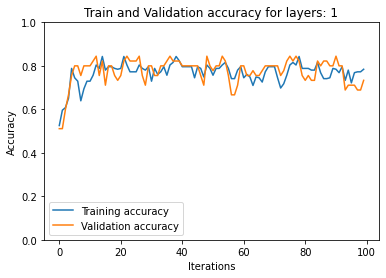

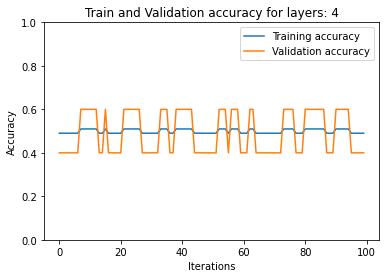

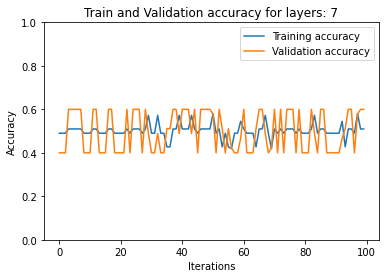

+---------------+---------------------+--------------------------+
| No. of Layers | Avg. Train Accuracy | Avg. Validation Accuracy |
+---------------+---------------------+--------------------------+
|       1       |  0.7677647058823528 |    0.7746666666666665    |
|       4       | 0.49921568627450985 |    0.4919999999999999    |
|       7       |  0.5009019607843137 |   0.49933333333333335    |
+---------------+---------------------+--------------------------+


In [22]:
param_list = {}
lays = [1,4,7]
p = PrettyTable(['No. of Layers', 'Avg. Train Accuracy','Avg. Validation Accuracy'])
for i in lays:
    weights,bias,avg_tr,avg_vl= train_n_display(p = i,get_weights=(i, dev.num_wires)
        
    )
    p.add_row([i,npd.average(avg_tr),npd.average(avg_vl)])
    param_list[i] = (weights,bias)

print(p)

Testing on test data

In [23]:
lay = [1,4,7]
g = PrettyTable(['Embedding Scheme','Layer Used','No. of Layers', 'Test Accuracy'])
for i in lay:
  weights, bias = param_list[i]
  Y_preds = [np.sign(variational_classifier(weights, bias, f)) for f in X_test]
  get_acc = accuracy(Y_test, Y_preds) 
  
  g.add_row(['All angle','Basic',i,get_acc])



print(g)

+------------------+------------+---------------+---------------------+
| Embedding Scheme | Layer Used | No. of Layers |    Test Accuracy    |
+------------------+------------+---------------+---------------------+
|    All angle     |   Basic    |       1       |  0.8666666666666667 |
|    All angle     |   Basic    |       4       |  0.5166666666666667 |
|    All angle     |   Basic    |       7       | 0.48333333333333334 |
+------------------+------------+---------------+---------------------+


The accuracy is best for layers=1 in this case among others.

**Strongly Entangling** **Layers**

Training the circuit

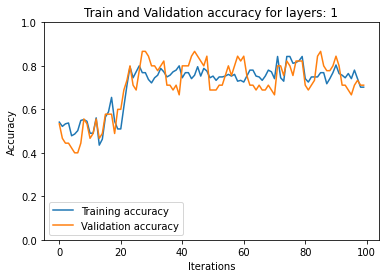

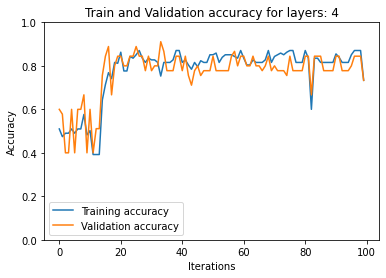

+---------------+---------------------+--------------------------+
| No. of Layers | Avg. Train Accuracy | Avg. Validation Accuracy |
+---------------+---------------------+--------------------------+
|       1       |  0.7112549019607841 |    0.7075555555555555    |
|       4       |  0.7745098039215687 |    0.7644444444444446    |
+---------------+---------------------+--------------------------+


In [25]:
@qml.qnode(dev)
def circuit(weights, features):
    ALL4ANGLE(features)

    qml.StronglyEntanglingLayers(weights, wires=range(dev.num_wires))

    return qml.expval(qml.PauliZ(0))
angstr_param_list = {}
lays = [1,4]
p = PrettyTable(['No. of Layers', 'Avg. Train Accuracy','Avg. Validation Accuracy'])
for i in lays:
    weights,bias,avg_tr,avg_vl= train_n_display(p = i,get_weights=(i, dev.num_wires,3))
        
   
    p.add_row([i,npd.average(avg_tr),npd.average(avg_vl)])
    angstr_param_list[i] = (weights,bias)

print(p)

Testing the circuit

In [26]:
lay = [1,4]

for i in lay:
  weights, bias = angstr_param_list[i]
  Y_preds = [np.sign(variational_classifier(weights, bias, f)) for f in X_test]
  get_acc = accuracy(Y_test, Y_preds) 
  
  g.add_row(['All angle','Strong',i,get_acc])



print(g)

+------------------+------------+---------------+---------------------+
| Embedding Scheme | Layer Used | No. of Layers |    Test Accuracy    |
+------------------+------------+---------------+---------------------+
|    All angle     |   Basic    |       1       |  0.8666666666666667 |
|    All angle     |   Basic    |       4       |  0.5166666666666667 |
|    All angle     |   Basic    |       7       | 0.48333333333333334 |
|    All angle     |   Strong   |       1       |  0.8333333333333334 |
|    All angle     |   Strong   |       4       |  0.7916666666666666 |
+------------------+------------+---------------+---------------------+


The best accuracy is  from layers=1 in this case also.

**Random Entangling**

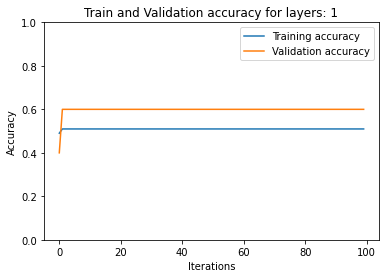

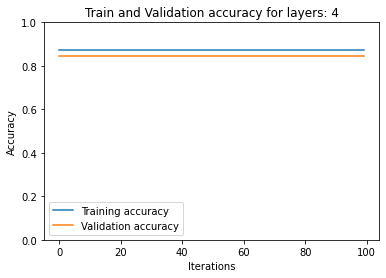

+---------------+---------------------+--------------------------+
| No. of Layers | Avg. Train Accuracy | Avg. Validation Accuracy |
+---------------+---------------------+--------------------------+
|       1       |  0.5096078431372548 |          0.598           |
|       4       |  0.8705882352941181 |    0.8444444444444446    |
+---------------+---------------------+--------------------------+


In [27]:
@qml.qnode(dev)
def circuit(weights, features):
    ALL4ANGLE(features)

    qml.RandomLayers(weights, wires=range(dev.num_wires))

    return qml.expval(qml.PauliZ(0))

angrnd_param_list = {}
lays = [1,4]
p = PrettyTable(['No. of Layers', 'Avg. Train Accuracy','Avg. Validation Accuracy'])
for i in lays:
    weights,bias,avg_tr,avg_vl= train_n_display(p = i,get_weights=(i, dev.num_wires))
        
   
    p.add_row([i,npd.average(avg_tr),npd.average(avg_vl)])
    angrnd_param_list[i] = (weights,bias)

print(p)



In [ ]:
angrnd_param_list

In [29]:
lay = [1,4]
for i in lay:
  weights, bias = angrnd_param_list[i]
  Y_preds = [np.sign(variational_classifier(weights, bias, f)) for f in X_test]
  get_acc = accuracy(Y_test, Y_preds) 
  
  g.add_row(['All angle','Random',i,get_acc])



print(g)

+------------------+------------+---------------+---------------------+
| Embedding Scheme | Layer Used | No. of Layers |    Test Accuracy    |
+------------------+------------+---------------+---------------------+
|    All angle     |   Basic    |       1       |  0.8666666666666667 |
|    All angle     |   Basic    |       4       |  0.5166666666666667 |
|    All angle     |   Basic    |       7       | 0.48333333333333334 |
|    All angle     |   Strong   |       1       |  0.8333333333333334 |
|    All angle     |   Strong   |       4       |  0.7916666666666666 |
|    All angle     |   Random   |       1       | 0.48333333333333334 |
|    All angle     |   Random   |       4       |  0.9416666666666667 |
|    All angle     |   Random   |       1       | 0.48333333333333334 |
|    All angle     |   Random   |       4       |  0.9416666666666667 |
+------------------+------------+---------------+---------------------+


The accuracy is best for layers = 4 .

In [34]:
print(g)

+------------------+------------+---------------+---------------------+
| Embedding Scheme | Layer Used | No. of Layers |    Test Accuracy    |
+------------------+------------+---------------+---------------------+
|    All angle     |   Basic    |       1       |  0.8666666666666667 |
|    All angle     |   Basic    |       4       |  0.5166666666666667 |
|    All angle     |   Basic    |       7       | 0.48333333333333334 |
|    All angle     |   Strong   |       1       |  0.8333333333333334 |
|    All angle     |   Strong   |       4       |  0.7916666666666666 |
|    All angle     |   Random   |       1       | 0.48333333333333334 |
|    All angle     |   Random   |       4       |  0.9416666666666667 |
+------------------+------------+---------------+---------------------+


Among the first mechanism considered, out of all the results, the best result is obtained using 4 random layers with test accuracy being `0.94 `

# Ampltiude Encoding

Here, all the features have been encoded using Amplitude Encoding strategy.

In [35]:
def ALL4AMPLI(df):

    qml.AmplitudeEmbedding(features=[(df[0]/5000),(df[1]/6),(df[2]/6),(df[3]/9)],wires=[0,1],normalize=True)
        

**Basic Entanglement**

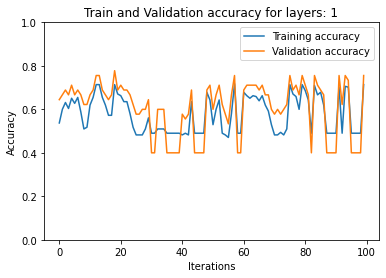

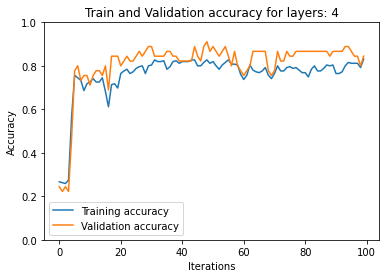

+---------------+---------------------+--------------------------+
| No. of Layers | Avg. Train Accuracy | Avg. Validation Accuracy |
+---------------+---------------------+--------------------------+
|       1       |  0.5769803921568628 |          0.608           |
|       4       |  0.7584313725490196 |    0.8077777777777778    |
+---------------+---------------------+--------------------------+


In [37]:
@qml.qnode(dev)
def circuit(weights, features):
    ALL4AMPLI(features)

    qml.BasicEntanglerLayers(weights, wires=range(dev.num_wires))

    return qml.expval(qml.PauliZ(0))

ampbas_param_list = {}
lays = [1,4]
p = PrettyTable(['No. of Layers', 'Avg. Train Accuracy','Avg. Validation Accuracy'])
for i in lays:
    weights,bias,avg_tr,avg_vl= train_n_display(p = i,get_weights=(i, dev.num_wires))
        
   
    p.add_row([i,npd.average(avg_tr),npd.average(avg_vl)])
    ampbas_param_list[i] = (weights,bias)

print(p)

In [ ]:
ampbas_param_list

In [38]:
lay = [1,4]
#g = PrettyTable(['Embedding Scheme','Layer Used','No. of Layers', 'Test Accuracy'])
for i in lay:
  weights, bias = ampbas_param_list[i]
  Y_preds = [np.sign(variational_classifier(weights, bias, f)) for f in X_test]
  get_acc = accuracy(Y_test, Y_preds) 
  
  g.add_row(['All amplitude','Basic',i,get_acc])



print(g)


+------------------+------------+---------------+---------------------+
| Embedding Scheme | Layer Used | No. of Layers |    Test Accuracy    |
+------------------+------------+---------------+---------------------+
|    All angle     |   Basic    |       1       |  0.8666666666666667 |
|    All angle     |   Basic    |       4       |  0.5166666666666667 |
|    All angle     |   Basic    |       7       | 0.48333333333333334 |
|    All angle     |   Strong   |       1       |  0.8333333333333334 |
|    All angle     |   Strong   |       4       |  0.7916666666666666 |
|    All angle     |   Random   |       1       | 0.48333333333333334 |
|    All angle     |   Random   |       4       |  0.9416666666666667 |
|  All amplitude   |   Basic    |       1       |  0.7916666666666666 |
|  All amplitude   |   Basic    |       4       |        0.925        |
+------------------+------------+---------------+---------------------+


**Strongly Entangling**

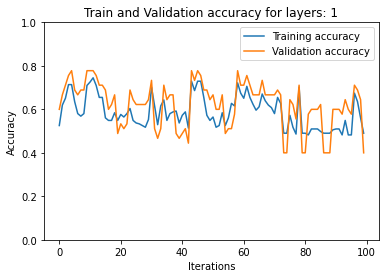

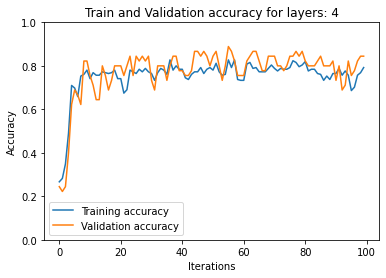

+---------------+---------------------+--------------------------+
| No. of Layers | Avg. Train Accuracy | Avg. Validation Accuracy |
+---------------+---------------------+--------------------------+
|       1       |  0.5866274509803922 |    0.6226666666666667    |
|       4       |  0.7523137254901959 |    0.7735555555555557    |
+---------------+---------------------+--------------------------+


In [39]:
@qml.qnode(dev)
def circuit(weights, features):
    ALL4AMPLI(features)

    qml.StronglyEntanglingLayers(weights, wires=range(dev.num_wires))

    return qml.expval(qml.PauliZ(0))
ampstr_param_list = {}
lays = [1,4]
p = PrettyTable(['No. of Layers', 'Avg. Train Accuracy','Avg. Validation Accuracy'])
for i in lays:
    weights,bias,avg_tr,avg_vl= train_n_display(p = i,get_weights=(i, dev.num_wires,3))
        
   
    p.add_row([i,npd.average(avg_tr),npd.average(avg_vl)])
    ampstr_param_list[i] = (weights,bias)

print(p)

In [40]:
lay = [1,4]
#g = PrettyTable(['Embedding Scheme','Layer Used','No. of Layers', 'Test Accuracy'])
for i in lay:
  weights, bias = ampstr_param_list[i]
  Y_preds = [np.sign(variational_classifier(weights, bias, f)) for f in X_test]
  get_acc = accuracy(Y_test, Y_preds) 
  
  g.add_row(['All amplitude','Strong',i,get_acc])



print(g)

+------------------+------------+---------------+---------------------+
| Embedding Scheme | Layer Used | No. of Layers |    Test Accuracy    |
+------------------+------------+---------------+---------------------+
|    All angle     |   Basic    |       1       |  0.8666666666666667 |
|    All angle     |   Basic    |       4       |  0.5166666666666667 |
|    All angle     |   Basic    |       7       | 0.48333333333333334 |
|    All angle     |   Strong   |       1       |  0.8333333333333334 |
|    All angle     |   Strong   |       4       |  0.7916666666666666 |
|    All angle     |   Random   |       1       | 0.48333333333333334 |
|    All angle     |   Random   |       4       |  0.9416666666666667 |
|  All amplitude   |   Basic    |       1       |  0.7916666666666666 |
|  All amplitude   |   Basic    |       4       |        0.925        |
|  All amplitude   |   Strong   |       1       |  0.5166666666666667 |
|  All amplitude   |   Strong   |       4       |  0.90833333333

**Random Layers**

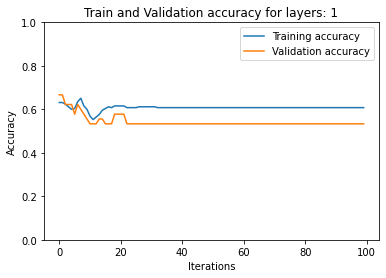

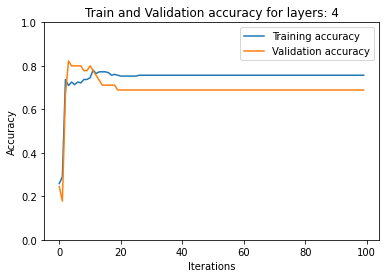

+---------------+---------------------+--------------------------+
| No. of Layers | Avg. Train Accuracy | Avg. Validation Accuracy |
+---------------+---------------------+--------------------------+
|       1       |  0.6078431372549019 |    0.5435555555555553    |
|       4       |  0.7453333333333331 |    0.6908888888888888    |
+---------------+---------------------+--------------------------+


In [41]:
@qml.qnode(dev)
def circuit(weights, features):
    ALL4AMPLI(features)

    qml.RandomLayers(weights, wires=range(dev.num_wires))

    return qml.expval(qml.PauliZ(0))
amprnd_param_list = {}
lays = [1,4]
p = PrettyTable(['No. of Layers', 'Avg. Train Accuracy','Avg. Validation Accuracy'])
for i in lays:
    weights,bias,avg_tr,avg_vl= train_n_display(p = i,get_weights=(i, dev.num_wires))
        
   
    p.add_row([i,npd.average(avg_tr),npd.average(avg_vl)])
    amprnd_param_list[i] = (weights,bias)

print(p)

In [42]:
lay = [1,4]

for i in lay:
  weights, bias = amprnd_param_list[i]
  Y_preds = [np.sign(variational_classifier(weights, bias, f)) for f in X_test]
  get_acc = accuracy(Y_test, Y_preds) 
  
  g.add_row(['All amplitude','Random',i,get_acc])



print(g)

+------------------+------------+---------------+---------------------+
| Embedding Scheme | Layer Used | No. of Layers |    Test Accuracy    |
+------------------+------------+---------------+---------------------+
|    All angle     |   Basic    |       1       |  0.8666666666666667 |
|    All angle     |   Basic    |       4       |  0.5166666666666667 |
|    All angle     |   Basic    |       7       | 0.48333333333333334 |
|    All angle     |   Strong   |       1       |  0.8333333333333334 |
|    All angle     |   Strong   |       4       |  0.7916666666666666 |
|    All angle     |   Random   |       1       | 0.48333333333333334 |
|    All angle     |   Random   |       4       |  0.9416666666666667 |
|  All amplitude   |   Basic    |       1       |  0.7916666666666666 |
|  All amplitude   |   Basic    |       4       |        0.925        |
|  All amplitude   |   Strong   |       1       |  0.5166666666666667 |
|  All amplitude   |   Strong   |       4       |  0.90833333333

Here the best accuracy obtained  is from Basic Entangling with number of layers = 4 and test accuracy value being `0.92`

# AngleAmpAngAmp

Here, 1st and 3rd features have been encoded using Angle Embedding with 2nd and 4th been encoded using Amplitude Embedding.

In [54]:
def AAAA(df):

    qml.AngleEmbedding(features=[(df[0]/5000) * np.pi],wires=[0,],rotation='X')
    qml.AmplitudeEmbedding(features=[(df[1]/6)+1,(df[3]/9)],wires=[1],normalize=True)
    qml.AngleEmbedding(features=[(df[2]/6)* np.pi],wires=[2,],rotation='X') 
     
    qml.Hadamard(0)   

dev = qml.device('default.qubit', wires=4)

**Basic Entanglement**

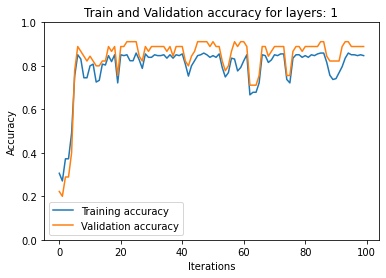

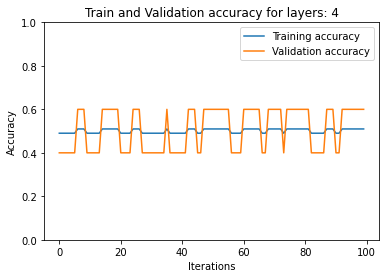

+---------------+---------------------+--------------------------+
| No. of Layers | Avg. Train Accuracy | Avg. Validation Accuracy |
+---------------+---------------------+--------------------------+
|       1       |  0.7936470588235293 |    0.833111111111111     |
|       4       |  0.5009803921568627 |           0.51           |
+---------------+---------------------+--------------------------+


In [55]:
@qml.qnode(dev)
def circuit(weights, features):
    AAAA(features)

    qml.BasicEntanglerLayers(weights, wires=range(dev.num_wires))

    return qml.expval(qml.PauliZ(0))

aaaabas_param_list = {}
lays = [1,4]
p = PrettyTable(['No. of Layers', 'Avg. Train Accuracy','Avg. Validation Accuracy'])
for i in lays:
    weights,bias,avg_tr,avg_vl= train_n_display(p = i,get_weights=(i, dev.num_wires))
        
   
    p.add_row([i,npd.average(avg_tr),npd.average(avg_vl)])
    aaaabas_param_list[i] = (weights,bias)

print(p)

In [56]:
lay = [1,4]

for i in lay:
  weights, bias = aaaabas_param_list[i]
  Y_preds = [np.sign(variational_classifier(weights, bias, f)) for f in X_test]
  get_acc = accuracy(Y_test, Y_preds) 
  
  g.add_row(['Angle Amp Angle Amp','Basic',i,get_acc])



print(g)

+---------------------+------------+---------------+---------------------+
|   Embedding Scheme  | Layer Used | No. of Layers |    Test Accuracy    |
+---------------------+------------+---------------+---------------------+
|      All angle      |   Basic    |       1       |  0.8666666666666667 |
|      All angle      |   Basic    |       4       |  0.5166666666666667 |
|      All angle      |   Basic    |       7       | 0.48333333333333334 |
|      All angle      |   Strong   |       1       |  0.8333333333333334 |
|      All angle      |   Strong   |       4       |  0.7916666666666666 |
|      All angle      |   Random   |       1       | 0.48333333333333334 |
|      All angle      |   Random   |       4       |  0.9416666666666667 |
|    All amplitude    |   Basic    |       1       |  0.7916666666666666 |
|    All amplitude    |   Basic    |       4       |        0.925        |
|    All amplitude    |   Strong   |       1       |  0.5166666666666667 |
|    All amplitude    |  

**Strong Entangling**

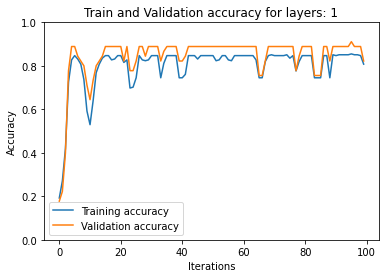

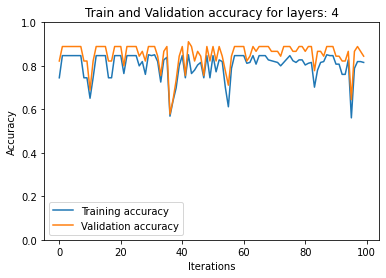

+---------------+---------------------+--------------------------+
| No. of Layers | Avg. Train Accuracy | Avg. Validation Accuracy |
+---------------+---------------------+--------------------------+
|       1       |  0.7999215686274509 |    0.8426666666666667    |
|       4       |  0.8024313725490194 |    0.8513333333333333    |
+---------------+---------------------+--------------------------+


In [57]:
@qml.qnode(dev)
def circuit(weights, features):
    AAAA(features)

    qml.StronglyEntanglingLayers(weights, wires=range(dev.num_wires))

    return qml.expval(qml.PauliZ(0))
aaaastr_param_list = {}
lays = [1,4]
p = PrettyTable(['No. of Layers', 'Avg. Train Accuracy','Avg. Validation Accuracy'])
for i in lays:
    weights,bias,avg_tr,avg_vl= train_n_display(p = i,get_weights=(i, dev.num_wires,3))
        
   
    p.add_row([i,npd.average(avg_tr),npd.average(avg_vl)])
    aaaastr_param_list[i] = (weights,bias)

print(p)

In [58]:
lay = [1,4]

for i in lay:
  weights, bias = aaaastr_param_list[i]
  Y_preds = [np.sign(variational_classifier(weights, bias, f)) for f in X_test]
  get_acc = accuracy(Y_test, Y_preds) 
  
  g.add_row(['Angle Amp Angle Amp','Strong',i,get_acc])



print(g)

+---------------------+------------+---------------+---------------------+
|   Embedding Scheme  | Layer Used | No. of Layers |    Test Accuracy    |
+---------------------+------------+---------------+---------------------+
|      All angle      |   Basic    |       1       |  0.8666666666666667 |
|      All angle      |   Basic    |       4       |  0.5166666666666667 |
|      All angle      |   Basic    |       7       | 0.48333333333333334 |
|      All angle      |   Strong   |       1       |  0.8333333333333334 |
|      All angle      |   Strong   |       4       |  0.7916666666666666 |
|      All angle      |   Random   |       1       | 0.48333333333333334 |
|      All angle      |   Random   |       4       |  0.9416666666666667 |
|    All amplitude    |   Basic    |       1       |  0.7916666666666666 |
|    All amplitude    |   Basic    |       4       |        0.925        |
|    All amplitude    |   Strong   |       1       |  0.5166666666666667 |
|    All amplitude    |  

**Random Layer**

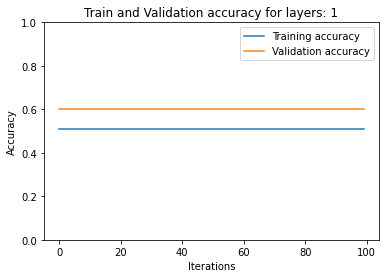

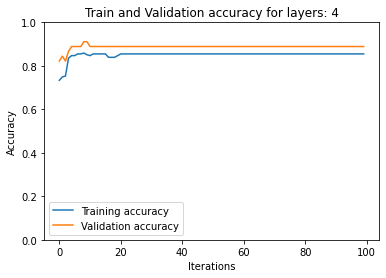

+---------------+---------------------+--------------------------+
| No. of Layers | Avg. Train Accuracy | Avg. Validation Accuracy |
+---------------+---------------------+--------------------------+
|       1       |  0.5098039215686273 |           0.6            |
|       4       |  0.8506274509803923 |    0.8873333333333335    |
+---------------+---------------------+--------------------------+


In [59]:
@qml.qnode(dev)
def circuit(weights, features):
    AAAA(features)

    qml.RandomLayers(weights, wires=range(dev.num_wires))

    return qml.expval(qml.PauliZ(0))
aaaarnd_param_list = {}
lays = [1,4]
p = PrettyTable(['No. of Layers', 'Avg. Train Accuracy','Avg. Validation Accuracy'])
for i in lays:
    weights,bias,avg_tr,avg_vl= train_n_display(p = i,get_weights=(i, dev.num_wires))
        
   
    p.add_row([i,npd.average(avg_tr),npd.average(avg_vl)])
    aaaarnd_param_list[i] = (weights,bias)

print(p)

In [60]:
lay = [1,4]
#g = PrettyTable(['Embedding Scheme','Layer Used','No. of Layers', 'Test Accuracy'])
for i in lay:
  weights, bias = aaaarnd_param_list[i]
  Y_preds = [np.sign(variational_classifier(weights, bias, f)) for f in X_test]
  get_acc = accuracy(Y_test, Y_preds) 
  
  g.add_row(['Angle Amp Angle Amp','Random',i,get_acc])



print(g)

+---------------------+------------+---------------+---------------------+
|   Embedding Scheme  | Layer Used | No. of Layers |    Test Accuracy    |
+---------------------+------------+---------------+---------------------+
|      All angle      |   Basic    |       1       |  0.8666666666666667 |
|      All angle      |   Basic    |       4       |  0.5166666666666667 |
|      All angle      |   Basic    |       7       | 0.48333333333333334 |
|      All angle      |   Strong   |       1       |  0.8333333333333334 |
|      All angle      |   Strong   |       4       |  0.7916666666666666 |
|      All angle      |   Random   |       1       | 0.48333333333333334 |
|      All angle      |   Random   |       4       |  0.9416666666666667 |
|    All amplitude    |   Basic    |       1       |  0.7916666666666666 |
|    All amplitude    |   Basic    |       4       |        0.925        |
|    All amplitude    |   Strong   |       1       |  0.5166666666666667 |
|    All amplitude    |  

Here accuracy of `1`has been obtained using basic entangler with 1 layer only. The other results are also close to `1`

# Angle Basis Basis Amplitude

Here, 1st feature has been encoded using AngleEncoding, 2nd and 3rd using Basis(they being discrete) and last using AmplitudeEncoding.

In [106]:
def AbBA(df):
    #ax11 = int(k) for k in f"{int(df[1]):01b}"
    
    qml.AngleEmbedding(features=[df[0]/5000 * np.pi],wires=[0,],rotation='X')
    qml.BasisEmbedding(features=[int(i) for i in f"{int(df[1]):03b}"],wires=[1,2,3])
    qml.BasisEmbedding(features=[int(i) for i in f"{int(df[2]):03b}"],wires=[4,5,6])
  
    qml.AmplitudeEmbedding(features=[df[3]/9],wires=[7,],pad_with=0.1)
     
    

dev1 = qml.device('default.qubit', wires=8)

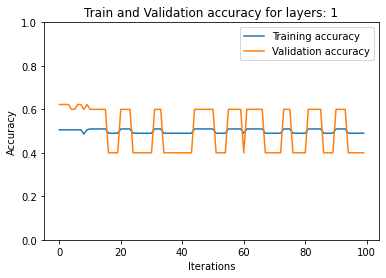

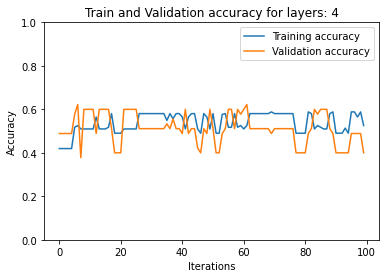

+---------------+---------------------+--------------------------+
| No. of Layers | Avg. Train Accuracy | Avg. Validation Accuracy |
+---------------+---------------------+--------------------------+
|       1       |  0.5000000000000001 |    0.5075555555555555    |
|       4       |  0.5375294117647058 |    0.5126666666666666    |
+---------------+---------------------+--------------------------+


In [107]:
@qml.qnode(dev1)
def circuit(weights, features):
    AbBA(features)

    qml.BasicEntanglerLayers(weights, wires=range(dev1.num_wires))

    return qml.expval(qml.PauliZ(0))

abbabas_param_list = {}
lays = [1,4]
p = PrettyTable(['No. of Layers', 'Avg. Train Accuracy','Avg. Validation Accuracy'])
for i in lays:
    weights,bias,avg_tr,avg_vl= train_n_display(p = i,get_weights=(i, dev1.num_wires))
        
   
    p.add_row([i,npd.average(avg_tr),npd.average(avg_vl)])
    abbabas_param_list[i] = (weights,bias)

print(p)

In [108]:
lay = [1,4]

for i in lay:
  weights, bias = abbabas_param_list[i]
  Y_preds = [np.sign(variational_classifier(weights, bias, f)) for f in X_test]
  get_acc = accuracy(Y_test, Y_preds) 
  
  g.add_row(['Angle Bas Bas Amp','Basic',i,get_acc])



print(g)

+---------------------+------------+---------------+---------------------+
|   Embedding Scheme  | Layer Used | No. of Layers |    Test Accuracy    |
+---------------------+------------+---------------+---------------------+
|      All angle      |   Basic    |       1       |  0.8666666666666667 |
|      All angle      |   Basic    |       4       |  0.5166666666666667 |
|      All angle      |   Basic    |       7       | 0.48333333333333334 |
|      All angle      |   Strong   |       1       |  0.8333333333333334 |
|      All angle      |   Strong   |       4       |  0.7916666666666666 |
|      All angle      |   Random   |       1       | 0.48333333333333334 |
|      All angle      |   Random   |       4       |  0.9416666666666667 |
|    All amplitude    |   Basic    |       1       |  0.7916666666666666 |
|    All amplitude    |   Basic    |       4       |        0.925        |
|    All amplitude    |   Strong   |       1       |  0.5166666666666667 |
|    All amplitude    |  

Here the test accuracy obtained is not so good i.e approx `0.5` only, so this case is further dropped.

# IQPEmbedding

Here, all features are encoded using IQP Embedding.

In [140]:
def iqp4(df):

    
    qml.IQPEmbedding(
        features=[df[0]/5000,df[1]/6,df[2]/6,df[3]/9],wires=range(4),n_repeats=3)
    
        
    

**Basic Entangling**

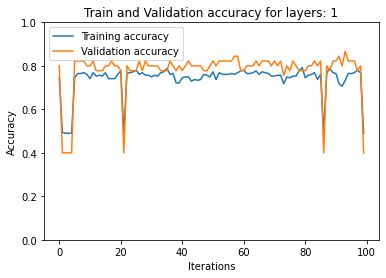

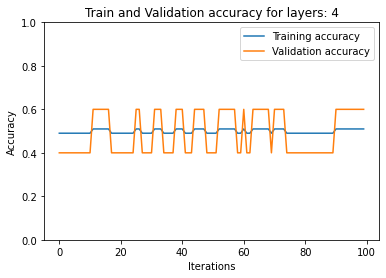

+---------------+---------------------+--------------------------+
| No. of Layers | Avg. Train Accuracy | Avg. Validation Accuracy |
+---------------+---------------------+--------------------------+
|       1       |  0.7390196078431371 |    0.7751111111111111    |
|       4       | 0.49901960784313715 |   0.49000000000000005    |
+---------------+---------------------+--------------------------+


In [142]:
@qml.qnode(dev)
def circuit(weights, features):
    iqp4(features)

    qml.BasicEntanglerLayers(weights, wires=range(dev.num_wires))

    return qml.expval(qml.PauliZ(0))
iqpbas_param_list = {}
lays = [1,4]
p = PrettyTable(['No. of Layers', 'Avg. Train Accuracy','Avg. Validation Accuracy'])
for i in lays:
    weights,bias,avg_tr,avg_vl= train_n_display(p = i,get_weights=(i, dev.num_wires))
        
   
    p.add_row([i,npd.average(avg_tr),npd.average(avg_vl)])
    iqpbas_param_list[i] = (weights,bias)

print(p)

In [143]:
lay = [1,4]

for i in lay:
  weights, bias = iqpbas_param_list[i]
  Y_preds = [np.sign(variational_classifier(weights, bias, f)) for f in X_test]
  get_acc = accuracy(Y_test, Y_preds) 
  
  g.add_row(['IQP4','Basic',i,get_acc])



print(g)

+---------------------+------------+---------------+---------------------+
|   Embedding Scheme  | Layer Used | No. of Layers |    Test Accuracy    |
+---------------------+------------+---------------+---------------------+
|      All angle      |   Basic    |       1       |  0.8666666666666667 |
|      All angle      |   Basic    |       4       |  0.5166666666666667 |
|      All angle      |   Basic    |       7       | 0.48333333333333334 |
|      All angle      |   Strong   |       1       |  0.8333333333333334 |
|      All angle      |   Strong   |       4       |  0.7916666666666666 |
|      All angle      |   Random   |       1       | 0.48333333333333334 |
|      All angle      |   Random   |       4       |  0.9416666666666667 |
|    All amplitude    |   Basic    |       1       |  0.7916666666666666 |
|    All amplitude    |   Basic    |       4       |        0.925        |
|    All amplitude    |   Strong   |       1       |  0.5166666666666667 |
|    All amplitude    |  

Here also the result obtained is less than `0.5`, so further layers haven't been considered. 

# Conclusion

1. Overall, the best combination of encoding and choosing good ansatz in this case has been achieved using mix of `Angle and Amplitude Embedding`, which gave the test accuracy of `1.0` in the simplest case with only 1 Basic entanglement layer. This can be because the circuit has been perfectly fit by training and validation data. Even other strategies of this combination gave nearly perfect results. Since 1st feature ( Column 0 ) contains data that is real and continuos valued, the `AngleEmbedding` might have been the best fit for that column. All amplitude embedding can also be said to be partially successful as it also gives values close to  `0.9`. 
2. However, the combination with `Basis embedding` and `IQP4` haven't shown any great results. These results can be improved further by trying various other layers, parameters,etc.
3. Some other techniques like `QAOAEmbedding`, `SimplifiedTwoDesign`, etc. haven't been considered to keep the structure simple and thorough.